### Comparing Models

Now that you have seen a variety of models for regression and classification problems, it is good to step back and weigh the pros and cons of these options.  In the case of classification models, there are at least three things to consider:

1. Is the model good at handling imbalanced classes?
2. Does the model train quickly?
3. Does the model yield interpretable results?

Depending on your dataset and goals, the importance of these considerations will vary from project to project.  Your goal is to review our models to this point and discuss the pros and cons of each.  Two example datasets are offered as a way to offer two very different tasks where interpretability of the model may be of differing importance.

### Data and Task

Your goal is to discuss the pros and cons of Logistic Regression, Decision Trees, KNN, and SVM for the tasks below.  Consider at least the three questions above and list any additional considerations you believe are important to determining the "best" model for the task.  Share your response with your peers on the class discussion board.  

**TASK 1**: Predicting Customer Churn

Suppose you are tasked with producing a model to predict customer churn.  Which of your classification models would you use and what are the pros and cons of this model for this task?  Be sure to consider interpretability, imbalnced classes, and the speed of training.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV, \
                                    HalvingRandomSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [2]:
from sklearn.datasets import load_digits

The data is loaded below.  Note that the handwritten digit data is already split into features and target (`digits`, `labels`). 

In [3]:
churn = pd.read_csv('data/telecom_churn.csv')
digits, labels = load_digits(return_X_y=True)

In [4]:
#churn data
churn.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

# Data Cleanup/Transform
### Churn

In [6]:
churn['State'] = pd.factorize(churn['State'])[0]

In [7]:
#churn['International plan'] = pd.factorize(churn['International plan'])[0]
churn['International plan'] = np.where(churn['International plan'] == 'Yes', 1, 0)

In [8]:
#churn['Voice mail plan'] = pd.factorize(churn['Voice mail plan'])[0]
churn['Voice mail plan'] = np.where(churn['Voice mail plan'] == 'Yes', 1, 0)

In [9]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   int64  
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   int64  
 4   Voice mail plan         3333 non-null   int64  
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [10]:
churn.Churn.value_counts(normalize = True)

False    0.855086
True     0.144914
Name: Churn, dtype: float64

<AxesSubplot:>

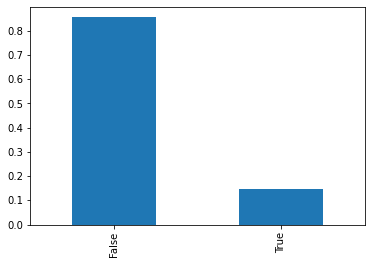

In [11]:
churn.Churn.value_counts(normalize = True).plot(kind='bar')

In [12]:
#churn_scaled = StandardScaler().fit_transform(churn)

### Digits

In [13]:
len(labels)

1797

In [14]:
len(digits)

1797

In [15]:
# sort by index
pd.DataFrame(labels).value_counts(normalize=True).sort_index()

0    0.099054
1    0.101280
2    0.098497
3    0.101836
4    0.100723
5    0.101280
6    0.100723
7    0.099610
8    0.096828
9    0.100167
dtype: float64

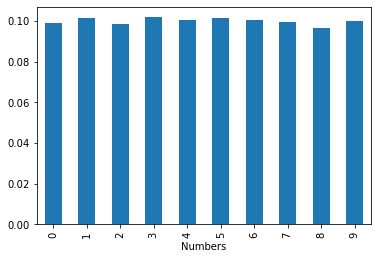

In [16]:
pd.DataFrame(labels).value_counts(normalize=True).sort_index().plot(kind='bar', xticks=range(0,10))
plt.xlabel('Numbers')
plt.show()

In [17]:
# split data
X, y = StandardScaler().fit_transform(churn.drop(['Churn'], axis=1)), churn['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 93, test_size = 0.3, stratify = y)

In [18]:
X.shape, churn.shape

((3333, 19), (3333, 20))

# Models

In [19]:
# Initialize estimators 
lgr = LogisticRegression()
# n_neighbors=5 by default!
knn = KNeighborsClassifier()
svc = SVC()
dtr = DecisionTreeClassifier()

In [20]:
# model executor
def model_executor(model, cv_cnt, params, scorer):
    model_grid = GridSearchCV(model, cv = cv_cnt, param_grid = params, scoring=scorer).fit(X_train, y_train)
    model_train = model_grid.score(X_train, y_train)
    model_test = model_grid.score(X_test, y_test)
    model_time = np.mean(model_grid.cv_results_['mean_fit_time'])
    model_params = model_grid.best_params_
    model_results = model_grid.cv_results_

    # results
    print(f'Training Accuracy: {model_train: .5f}')
    print(f'Test Accuracy    : {model_test: .5f}')
    print(f'Average Fit Time : {model_time: .5f}')
    print(f'Best parameters of {model}: {model_params}')

    # confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test, model_grid.predict(X_test))
    plt.title('Confusion Matrix')
    plt.grid(False)
    plt.show()

    return model_grid, model_train, model_test, model_time, model_params, model_results

In [21]:
# set scorer for GridSearchCV()
#scorer = 'accuracy'
scorer = 'roc_auc'

## Churn

## Logistic Regression

Training Accuracy:  0.83207
Test Accuracy    :  0.79874
Average Fit Time :  0.02973
Best parameters of LogisticRegression(): {'penalty': 'l1', 'solver': 'liblinear'}


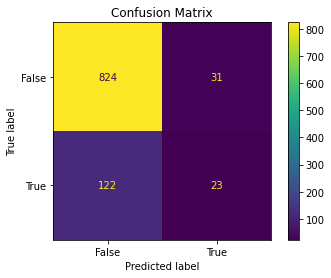

CPU times: user 1.64 s, sys: 15.5 ms, total: 1.65 s
Wall time: 842 ms


In [22]:
%%time
# Logistic Regression
params = {'penalty': ['l1', 'l2'], 'solver':['liblinear']}
# lgr_grid = GridSearchCV(lgr, cv = 5, param_grid = params, scoring=scorer).fit(X_train, y_train)
# lgr_train = lgr_grid.score(X_train, y_train)
# lgr_test = lgr_grid.score(X_test, y_test)
# lgr_time = np.mean(lgr_grid.cv_results_['mean_fit_time']) #+ np.mean(lgr_grid.cv_results_['mean_score_time'])
# lgr_params = lgr_grid.best_params_

lgr_grid, lgr_train, lgr_test, lgr_time, lgr_params, lgr_results = model_executor(lgr, 10, params, scorer)
# print(f'Training Accuracy: {lgr_train: .5f}')
# print(f'Test Accuracy    : {lgr_test: .5f}')
# print(f'Average Fit Time : {lgr_time: .5f}')
# print(f'Best parameters of tree: {lgr_params}')

## KNN

Training Accuracy:  1.00000
Test Accuracy    :  0.87360
Average Fit Time :  0.00077
Best parameters of KNeighborsClassifier(): {'n_neighbors': 23, 'weights': 'distance'}


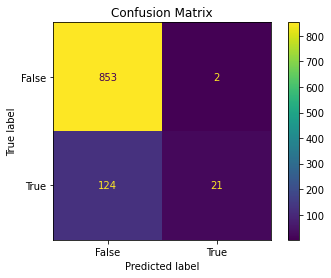

CPU times: user 21.3 s, sys: 882 ms, total: 22.2 s
Wall time: 2.87 s


In [23]:
%%time
# KNN
params = {'n_neighbors': range(1, min(len(y_test),25), 2), 'weights':['uniform', 'distance']}
# knn_grid = GridSearchCV(knn, cv = 5, param_grid = params, scoring=scorer).fit(X_train, y_train)
# knn_train = knn_grid.score(X_train, y_train)
# knn_test = knn_grid.score(X_test, y_test)
# knn_time = np.mean(knn_grid.cv_results_['mean_fit_time']) #+ np.mean(knn_grid.cv_results_['mean_score_time'])
# knn_params = knn_grid.best_params_

knn_grid, knn_train, knn_test, knn_time, knn_params, knn_results = model_executor(knn, 10, params, scorer)
# print(f'Training Accuracy: {knn_train: .5f}')
# print(f'Test Accuracy    : {knn_test: .5f}')
# print(f'Average Fit Time : {knn_time: .5f}')
# print(f'Best parameters of tree: {knn_params}')

## SVC

Training Accuracy:  0.97560
Test Accuracy    :  0.88999
Average Fit Time :  0.11606
Best parameters of SVC(): {'gamma': 0.1, 'kernel': 'rbf'}


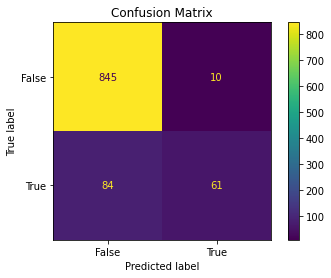

CPU times: user 16.4 s, sys: 68.7 ms, total: 16.4 s
Wall time: 16.3 s


In [24]:
%%time
# SVC
params = {'kernel': ['rbf', 'linear', 'sigmoid', 'poly'], 'gamma': [0.1, 1, 10]}
# svc_grid = GridSearchCV(svc, cv = 5, param_grid = params, scoring=scorer).fit(X_train, y_train)
# svc_train = svc_grid.score(X_train, y_train)
# svc_test = svc_grid.score(X_test, y_test)
# svc_time = np.mean(svc_grid.cv_results_['mean_fit_time']) #+ np.mean(svc_grid.cv_results_['mean_score_time'])
# svc_params = svc_grid.best_params_

svc_grid, svc_train, svc_test, svc_time, svc_params, svc_results = model_executor(svc, 10, params, scorer)
# print(f'Training Accuracy: {svc_train: .5f}')
# print(f'Test Accuracy    : {svc_test: .5f}')
# print(f'Average Fit Time : {svc_time: .5f}')
# print(f'Best parameters of tree: {svc_params}')

## Decision Tree

Training Accuracy:  0.93440
Test Accuracy    :  0.89468
Average Fit Time :  0.00801
Best parameters of DecisionTreeClassifier(): {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 0.05}


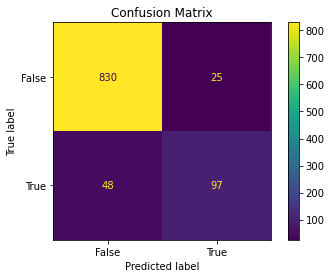

CPU times: user 15.7 s, sys: 40 ms, total: 15.7 s
Wall time: 15.7 s


In [25]:
%%time
#Decision Tree
#dtr.fit(X_train, y_train)
params = {'max_depth': [2, 3, 4, 5, 6, 7, 10],
          'min_samples_split': [0.1, 0.2, 0.05],
          'criterion': ['gini', 'entropy'],
          'min_samples_leaf': [2, 3, 4, 5]
         }
# HalvingRandomSearchCV
# dtr_grid = HalvingRandomSearchCV(dtr, param_distributions=params).fit(X_train, y_train)
# dtr_train = dtr_grid.score(X_train, y_train)
# dtr_test = dtr_grid.score(X_test, y_test)
# dtr_time = np.mean(dtr_grid.cv_results_['mean_fit_time']) #+ np.mean(dtr_grid.cv_results_['mean_score_time'])
# dtr_params = dtr_grid.best_params_

dtr_grid, dtr_train, dtr_test, dtr_time, dtr_params, dtr_results = model_executor(dtr, 10, params, scorer)
# print(f'Training Accuracy: {dtr_train: .5f}')
# print(f'Test Accuracy    : {dtr_test: .5f}')
# print(f'Average Fit Time : {dtr_time: .5f}')
# print(f'Best parameters of tree: {dtr_params}')

Text(0.5, 1.0, 'GridSearchCV @ 7 Levels')

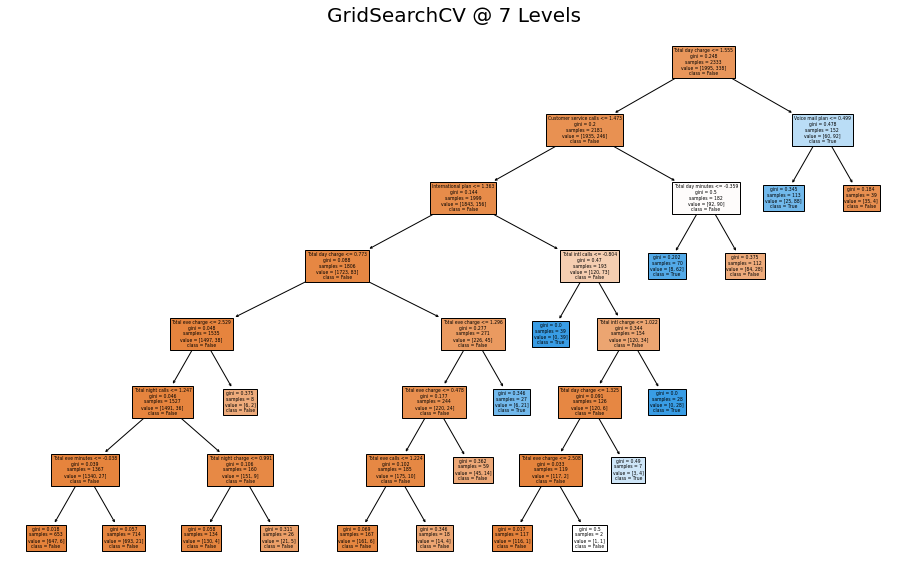

In [26]:
# Plot Decision tree
fig, ax = plt.subplots(figsize = (16, 10))
# GridSearchCV
plot_tree(dtr_grid.best_estimator_, ax = ax, filled = True, feature_names = churn.drop(['Churn'], axis=1).columns,
          class_names=['False', 'True'])
plt.title(f'GridSearchCV @ {dtr_params["max_depth"]} Levels', fontsize = 20)
#plt.show()

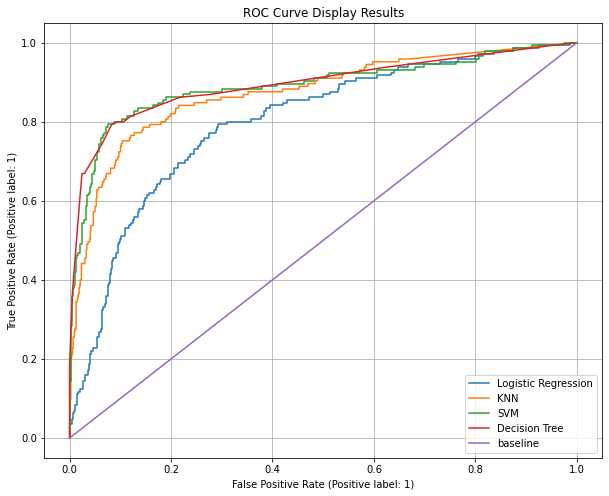

In [27]:
# ROC Curve
fig, ax = plt.subplots(figsize=(10,8))
RocCurveDisplay.from_estimator(lgr_grid, X_test, y_test, pos_label = 1, ax = ax, label = 'Logistic Regression')
RocCurveDisplay.from_estimator(knn_grid, X_test, y_test, pos_label = 1, ax = ax, label = 'KNN')
RocCurveDisplay.from_estimator(svc_grid, X_test, y_test, pos_label = 1, ax = ax, label = 'SVM')
RocCurveDisplay.from_estimator(dtr_grid, X_test, y_test, pos_label = 1, ax = ax, label = 'Decision Tree')
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline')
plt.title('ROC Curve Display Results')
plt.legend()
plt.grid(True)

In [28]:
print(f'Average Fit Time : {lgr_time: .5f}')
print(f'Average Fit Time : {knn_time: .5f}')
print(f'Average Fit Time : {svc_time: .5f}')
print(f'Average Fit Time : {dtr_time: .5f}')

Average Fit Time :  0.02973
Average Fit Time :  0.00077
Average Fit Time :  0.11606
Average Fit Time :  0.00801


In [29]:
df=pd.DataFrame({'model':['KNN', 'Logistic Regression', 'SVC', 'Decision Tree'],
              'train score':[knn_train, lgr_train, svc_train, dtr_train],
              'test score':[knn_test, lgr_test, svc_test, dtr_test],
              'average fit time':[knn_time, lgr_time, svc_time, dtr_time]
             })
df

,model,train score,test score,average fit time
0,KNN,1.000000,0.873604,0.000773
1,Logistic Regression,0.832070,0.798742,0.029731
2,SVC,0.975603,0.889994,0.116058
3,Decision Tree,0.934397,0.894676,0.008015


**TASK 2**: Recognizing Handwritten Digits

Suppose you are tasked with training a model to recognize handwritten digits.  Which of your classifier would you use here and why?  Again, be sure to consider the balance of classes, speed of training, and importance of interpretability.



In [30]:
digits

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [31]:
len(digits)

1797

In [32]:
digits[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [33]:
len(digits[0])

64

In [34]:
labels[1]

1

# Digits

In [35]:
# split data
X, y = digits, labels
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 93, test_size = 0.3, stratify = y)

In [36]:
#example image
def show_image(image):
    plt.imshow(X[image].reshape(8, 8))
    plt.title(f'This is a handwritten {y[image]}.')

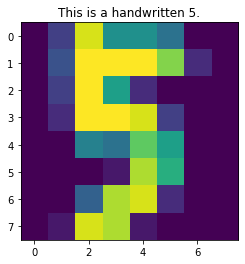

In [37]:
show_image(35)

In [38]:
# set scorer for GridSearchCV()
scorer = 'accuracy'
#scorer = 'roc_auc'

## Logistic Regression

Training Accuracy:  0.99682
Test Accuracy    :  0.96296
Average Fit Time :  0.16180
Best parameters of LogisticRegression(): {'penalty': 'l1', 'solver': 'liblinear'}


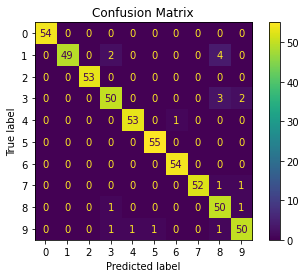

CPU times: user 25.3 s, sys: 235 ms, total: 25.6 s
Wall time: 3.88 s


In [39]:
%%time
# Logistic Regression
params = {'penalty': ['l1', 'l2'], 'solver':['liblinear']}

lgr_grid, lgr_train, lgr_test, lgr_time, lgr_params, lgr_results = model_executor(lgr, 10, params, scorer)


## KNN

Training Accuracy:  1.00000
Test Accuracy    :  0.98333
Average Fit Time :  0.00049
Best parameters of KNeighborsClassifier(): {'n_neighbors': 1, 'weights': 'uniform'}


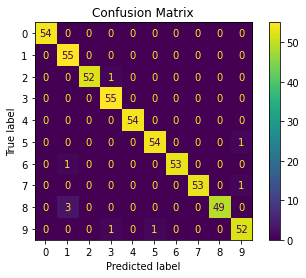

CPU times: user 7.51 s, sys: 118 ms, total: 7.63 s
Wall time: 1.1 s


In [40]:
%%time
# KNN
params = {'n_neighbors': range(1, min(len(y_test),15), 2), 'weights':['uniform', 'distance']}

knn_grid, knn_train, knn_test, knn_time, knn_params, knn_results = model_executor(knn, 10, params, scorer)


## SVC

Training Accuracy:  1.00000
Test Accuracy    :  0.99074
Average Fit Time :  0.05954
Best parameters of SVC(): {'gamma': 0.01, 'kernel': 'poly'}


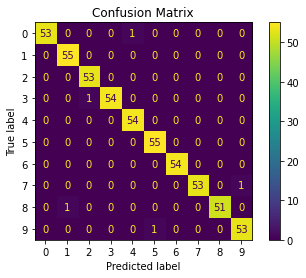

CPU times: user 8.69 s, sys: 32.5 ms, total: 8.72 s
Wall time: 8.72 s


In [41]:
%%time
# SVC
params = {'kernel': ['rbf', 'linear', 'sigmoid', 'poly'], 'gamma': [0.01, 0.1, 1.0]}

svc_grid, svc_train, svc_test, svc_time, svc_params, svc_results = model_executor(svc, 10, params, scorer)


## Decision Tree

Training Accuracy:  0.84566
Test Accuracy    :  0.79259
Average Fit Time :  0.00605
Best parameters of DecisionTreeClassifier(): {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 0.05}


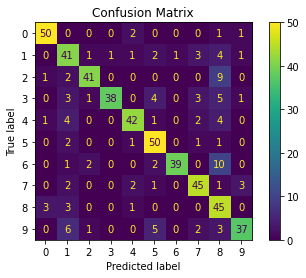

CPU times: user 13 s, sys: 37.4 ms, total: 13 s
Wall time: 13 s


In [42]:
%%time
#Decision Tree
#dtr.fit(X_train, y_train)
params = {'max_depth': [5, 7, 9, 10, 11, 13, 15, 20],
          'min_samples_split': [0.1, 0.2, 0.05],
          'criterion': ['gini', 'entropy'],
          'min_samples_leaf': [2, 3, 4, 5]
         }
# HalvingRandomSearchCV
# dtr_grid = HalvingRandomSearchCV(dtr, param_distributions=params).fit(X_train, y_train)

dtr_grid, dtr_train, dtr_test, dtr_time, dtr_params, dtr_results = model_executor(dtr, 10, params, scorer)


In [43]:
[str(x) for x in (range(0,10))]

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

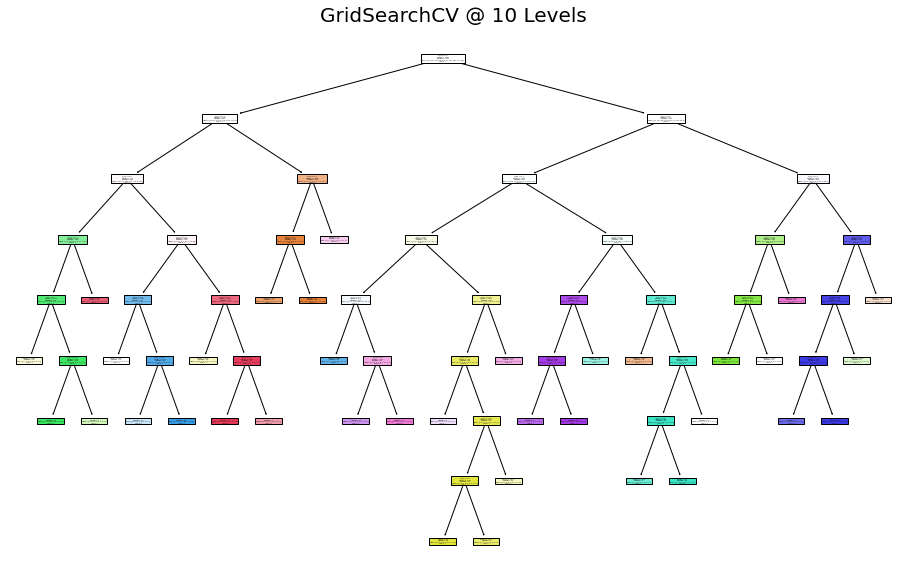

In [44]:
# Plot Decision tree
fig, ax = plt.subplots(figsize = (16, 10))
# GridSearchCV
plot_tree(dtr_grid.best_estimator_, ax = ax, filled = True, class_names=[str(x) for x in (range(0,10))])
plt.title(f'GridSearchCV @ {dtr_params["max_depth"]} Levels', fontsize = 20)
plt.show()

In [45]:
# # ROC Curve - just for binary classification!
# fig, ax = plt.subplots(figsize=(10,8))
# RocCurveDisplay.from_estimator(lgr_grid, X_test, y_test, pos_label = 1, ax = ax, label = 'Logistic Regression')
# RocCurveDisplay.from_estimator(knn_grid, X_test, y_test, pos_label = 1, ax = ax, label = 'KNN')
# RocCurveDisplay.from_estimator(svc_grid, X_test, y_test, pos_label = 1, ax = ax, label = 'SVM')
# RocCurveDisplay.from_estimator(dtr_grid, X_test, y_test, pos_label = 1, ax = ax, label = 'Decision Tree')
# plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline')
# plt.title('ROC Curve Display Results')
# plt.legend()
# plt.grid(True)

In [46]:
df=pd.DataFrame({'model':['KNN', 'Logistic Regression', 'SVC', 'Decision Tree'],
              'train score':[knn_train, lgr_train, svc_train, dtr_train],
              'test score':[knn_test, lgr_test, svc_test, dtr_test],
              'average fit time':[knn_time, lgr_time, svc_time, dtr_time]
             })
df

,model,train score,test score,average fit time
0,KNN,1.000000,0.983333,0.000493
1,Logistic Regression,0.996818,0.962963,0.161798
2,SVC,1.000000,0.990741,0.059543
3,Decision Tree,0.845664,0.792593,0.006051


In [47]:
lgr

LogisticRegression()

In [48]:
knn

KNeighborsClassifier()

In [49]:
svc

SVC()

In [50]:
dtr

DecisionTreeClassifier()